# Task 2 (3) (Optimisation methods)

**Done by Arina Shinkorenok, group j4132c**

## Description

1. Develop yourself using numpy library:

a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).

b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).

2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.

4. Write a conclusions about the accuracy of the implemented algorithms.


In [1]:
# import libraries
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# define the function to be optimized
def function(x, y):
    return x**2 + y**2 + 10*np.sin(x) + 10*np.cos(y)

# define the gradient of the function
def gradient(x, y):
    df_dx = 2*x + 10*np.cos(x)
    df_dy = 2*y - 10*np.sin(y)
    return np.array([df_dx, df_dy])

### a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).

In [3]:
# implement the gradient descent optimization algorithm with momentum
def gradient_descent_with_momentum(lr=0.1, beta=0.9, epsilon=1e-8, max_iterations=1000):

    # initialize parameters and variables
    # theta = np.random.uniform(-10, 10, size=2)
    theta = (1.0, 1.0)
    v = np.zeros_like(theta)
    iterations = 0
    x_seq, y_seq, diff_curr, diff_prev = [], [], [], []

    # perform gradient descent with momentum until convergence or maximum iterations
    while np.linalg.norm(gradient(*theta)) > epsilon and iterations < max_iterations:
        x_seq.append(theta[0])
        y_seq.append(theta[1])
        diff_curr.append(theta[0] - x_seq[-2] if len(x_seq) > 1 else 0)
        diff_prev.append(theta[1] - y_seq[-2] if len(y_seq) > 1 else 0)

        # record current values and differences
        v = beta * v + lr * gradient(*theta)
        theta = theta - v
        iterations += 1

    return (
        theta,
        function(*theta),
        iterations, x_seq[1:],
        y_seq[1:],
        diff_curr[1:],
        diff_prev[1:]
        )

### b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).

In [4]:
# implement the ADAM optimization algorithm
def adam_optimizer(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000):

    # initialize parameters and variables
    # theta = np.random.uniform(-10, 10, size=2)
    theta = (1.0, 1.0)
    m, v = np.zeros_like(theta), np.zeros_like(theta)
    iterations = 0
    x_seq, y_seq, diff_curr, diff_prev = [], [], [], []

    # perform ADAM optimization until convergence or maximum iterations
    while np.linalg.norm(gradient(*theta)) > epsilon and iterations < max_iterations:
        x_seq.append(theta[0])
        y_seq.append(theta[1])
        diff_curr.append(theta[0] - x_seq[-2] if len(x_seq) > 1 else 0)
        diff_prev.append(theta[1] - y_seq[-2] if len(y_seq) > 1 else 0)

        # calculate gradients and update first and second moments
        grad = gradient(*theta)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2

        # bias correction for first and second moments
        m_hat = m / (1 - beta1**(iterations + 1))
        v_hat = v / (1 - beta2**(iterations + 1))

        # update parameters using bias-corrected moments
        theta = theta - lr * m_hat / (np.sqrt(v_hat) + epsilon)
        iterations += 1

    return (
        theta,
        function(*theta),
        iterations,
        x_seq[1:],
        y_seq[1:],
        diff_curr[1:],
        diff_prev[1:]
        )

In [5]:
# perform gradient descent and adam optimisations and record the results
(
    theta_momentum,
    min_momentum,
    iterations_momentum,
    x_seq_momentum,
    y_seq_momentum,
    diff_curr_momentum,
    diff_prev_momentum
) = gradient_descent_with_momentum()

(
    theta_adam,
    min_adam,
    iterations_adam,
    x_seq_adam,
    y_seq_adam,
    diff_curr_adam,
    diff_prev_adam
) = adam_optimizer()

In [6]:
print("Gradient Descent with Momentum Algorithm:")
print("x and y:", theta_momentum)
print("f(x,y):", min_momentum)
print("number of iterations:", iterations_momentum)

print("ADAM Optimization Algorithm:")
print("x and y:", theta_adam)
print("f(x,y):", min_adam)
print("number of iterations:", iterations_adam)

Gradient Descent with Momentum Algorithm:
x and y: [-1.30644001  2.59573908]
f(x,y): -9.75480671743675
number of iterations: 397
ADAM Optimization Algorithm:
x and y: [-1.30644001  2.59573908]
f(x,y): -9.754806717436752
number of iterations: 398


In [7]:
# generate values for x and y within a specified range
x_values = np.arange(-5, 5, 0.25)
y_values = np.arange(-5, 5, 0.25)

# create a grid of x and y values
X, Y = np.meshgrid(x_values, y_values)

# compute the function values (Z) and gradient vectors (U, V) for the given grid
Z = function(X, Y)
U, V = gradient(X, Y)

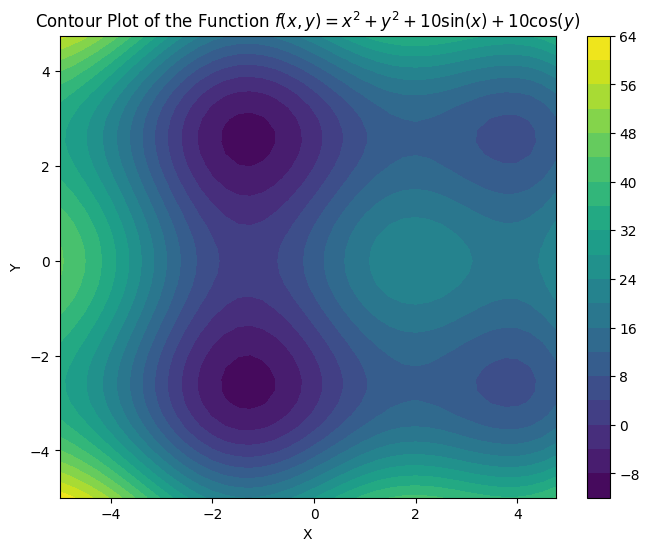

In [8]:
# contour plot for the function
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of the Function $f(x, y) = x^2 + y^2 + 10\sin(x) + 10\cos(y)$')
plt.show()

In [9]:
# function to differentiate
fig = go.Figure(data=[go.Surface(x=X,y=Y,z=Z)])
fig.update_layout(
    title="Function to Differentiate",
    autosize=False,
    width=500,
    height=500
)

fig.show()

### Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.

In [10]:
# create a contour plot of the function
def contourPlot(x, y, x_seq, y_seq, Algorithm):
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    fig = go.Figure(data=
        go.Contour(z=Z, x=x, y=y, contours_coloring="lines")
    )

    fig.add_trace(
        # go.Scatter(x=x_seq, y=y_seq, mode='markers', name='Optimization ' + Algorithm)
        go.Scatter(x=x_seq, y=y_seq, mode='lines+markers', name='Optimization ' + Algorithm)

    )\
        .update_traces(line_color="blue")
    fig.update_layout(title_text='Optimization of function $f(x, y) = x^2 + y^2 + 10\sin(x) + 10\cos(y)$',
                      xaxis_title='x', yaxis_title='y')

    fig.show()

In [11]:
# create a plot with current and previous difference values
def differencePlot(diffCurr, diffPrev, title):
    fig = go.Figure(go.Scatter(y=diffCurr, name="Curr"))
    fig.add_scatter(y=diffPrev, name="Prev")
    fig.update_layout(title_text=title, xaxis_title='Iteration', yaxis_title='Difference')
    fig.show()

In [12]:
contourPlot(x_values, y_values, x_seq_momentum, y_seq_momentum, "Gradient Descent with Momentum Algorithm")

In [13]:
differencePlot(diff_curr_momentum, diff_prev_momentum, "Gradient Descent with Momentum Algorithm: curr – prev")

In [14]:
contourPlot(x_values, y_values, x_seq_adam, y_seq_adam, "ADAM Optimization Algorithm")

In [15]:
differencePlot(diff_curr_adam, diff_prev_adam, "ADAM Optimization Algorithm: curr – prev")

### Conclusion about the accuracy of the implemented algorithms

Two algorithms were considered in this task: Gradient Descent with Momentum and the ADAM Optimisation Algorithm.

After comparing the accuracy of the implemented optimization algorithms Gradient Descent, with Momentum and the ADAM Optimization Algorithm we can draw the following conclusions based on the provided results:

- Both optimization algorithms successfully converged to the minimum point, represented by the coordinates (x = 1.30644001, y = 2.59573908). This indicates that both algorithms were able to find the solution for the given task.
-Gradient Descent with Momentum reached a value of 9.75480671743675 while the ADAM Optimization Algorithm reached a minimum value of approximately 9.754806717436752. This difference is extremely small. May be attributed to precision in the computations or specific implementation details.
- The number of iterations required for convergence was slightly different between the two algorithms with Gradient Descent with Momentum requiring 397 iterations and the ADAM Optimization Algorithm requiring 398 iterations. Again this difference is marginal.

|Algorithm|x|y|f(x,y)|Number of iterations|
|:----:|:----:|:----:|:----:|:----:|
|SGDM|-1.30644001|2.59573908|-9.75480671743675|397|
|ADAM|-1.30644001|2.59573908|-9.754806717436752|398|

In conclusion both the Gradient Descent, with Momentum and the ADAM Optimization Algorithm have shown a level of accuracy in locating the point of the optimization problem. The differences observed in the value and number of iterations are minor.